## Neural Network Demo - Visualized

In [76]:
import random
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.datasets import make_moons

from engine import Value
from nn import MLP

In [77]:
np.random.seed(1337)
random.seed(1337)

# Graph our data set

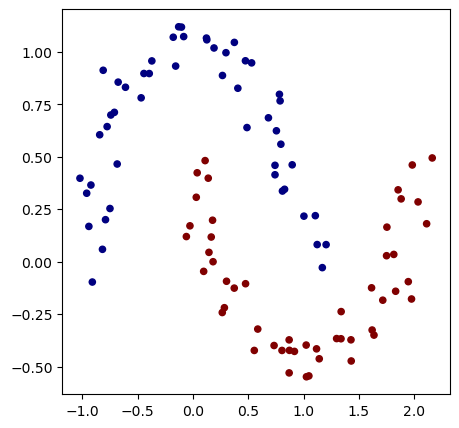

In [71]:
# Generate a new dataset
points, labels = make_moons(n_samples=100, noise=0.1)
labels = labels*2 - 1 # make labels -1 or 1, instead of 1 or 0

plt.figure(figsize=(5,5))
plt.scatter(points[:,0], points[:,1], c=labels, s=20, cmap='jet')

In [72]:
# Initialize our model
model = MLP(2, [16,16,1])
print(model)
print("parameters:", len(model.parameters()))

MLP of [Layer of [ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2)], Layer of [ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16)], Layer of [Linear Neuron(16)]]
parameters: 337


In [78]:
def loss():
    inputs = [list(map(Value, xrow)) for xrow in points]

    # forward pass
    scores = list(map(model, inputs))
    # svm max margin loss
    losses = [(1 + -yi * scorei).relu() for yi, scorei in zip(labels, scores)]
    data_loss = sum(losses) * (1.0/len(losses))

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(labels, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print("total loss:", total_loss)
print("accuracy:", acc)

total loss: Value(data=0.013466818236600743, grad=0)
accuracy: 1.0


In [74]:
# train model
for k in range(100):

    # forward
    total_loss, acc = loss()

    # backward
    model.zero_grad()
    total_loss.backward()

    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    print(f"step {k}: loss {total_loss.data}, accuracy {acc*100}%")

step 0: loss 1.1815924818239036, accuracy 50.0%
step 1: loss 3.12262907620658, accuracy 50.0%
step 2: loss 0.9954343872910139, accuracy 66.0%
step 3: loss 0.9268451125083014, accuracy 50.0%
step 4: loss 0.45763213308760353, accuracy 78.0%
step 5: loss 0.41172242379752133, accuracy 90.0%
step 6: loss 0.8657108727684601, accuracy 78.0%
step 7: loss 0.29166887811300285, accuracy 88.0%
step 8: loss 0.2615831275066244, accuracy 89.0%
step 9: loss 0.2619789627820202, accuracy 88.0%
step 10: loss 0.3176038682804336, accuracy 89.0%
step 11: loss 0.23983920971261072, accuracy 90.0%
step 12: loss 0.3149988422161902, accuracy 89.0%
step 13: loss 0.25036834450082246, accuracy 89.0%
step 14: loss 0.3213014323603636, accuracy 90.0%
step 15: loss 0.21742970390898111, accuracy 91.0%
step 16: loss 0.2404586527669329, accuracy 90.0%
step 17: loss 0.2030977517800736, accuracy 92.0%
step 18: loss 0.2921205068562731, accuracy 89.0%
step 19: loss 0.19733871257273508, accuracy 91.0%
step 20: loss 0.225777443

(-1.548639298268643, 1.951360701731357)

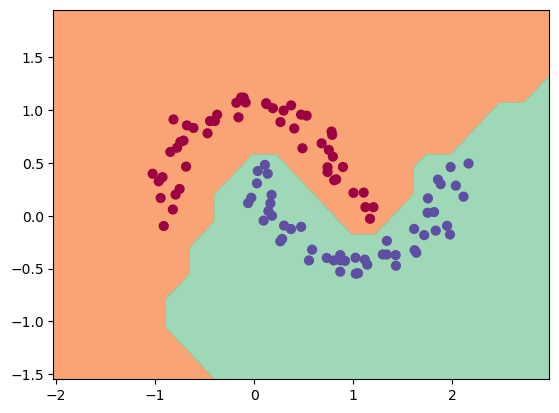

In [75]:
# visualize decision boundary

h = 0.25
x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(points[:, 0], points[:, 1], c=labels, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())